# Library import

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import sys
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

## mnist dataset

In [2]:
# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (60000, 28, 28)
y_train shape : (60000,)
X_test shape : (10000, 28, 28)
y_test shape : (10000,)


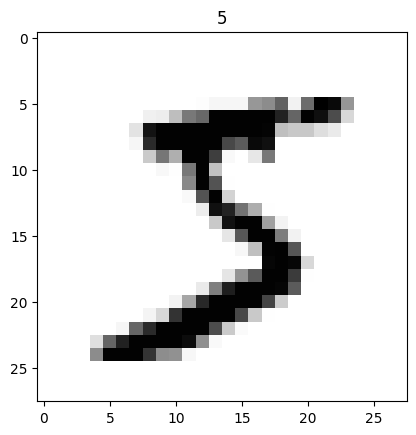

In [4]:
# 첫 번째 이미지를 확인
# 28 * 28 image
plt.imshow(X=X_train[0], cmap='Greys')
plt.title(y_train[0])
plt.show()

In [5]:
# 이미지 인식
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [10]:
# 차원 변환 과정 (2차원 -> 1차원)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [11]:
# 실수화
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 정규화 (0 to 1)
X_train = X_train / 255
X_test = X_test/ 255

In [12]:
# 클래스 값 확인
print("class : %d " % (y_train[0]))

class : 5 


In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
# 바이너리화 과정 (One-Hot Encoding)
# get_dummies / to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [16]:
# 모델 구조를 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# 모델 실행 환경을 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 모델 최적화를 위한 설정 구간
modelpath= './model_storage/MNIST_MLP.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [20]:
# 모델을 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, 
         batch_size=200, verbose=1, callbacks=[checkpointer, early_stopping_callback])

Epoch 1/100
217/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8258 - loss: 0.6196
Epoch 1: val_loss improved from inf to 0.18696, saving model to ./model_storage/MNIST_MLP.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8288 - loss: 0.6091 - val_accuracy: 0.9475 - val_loss: 0.1870
Epoch 2/100
205/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9547 - loss: 0.1645
Epoch 2: val_loss improved from 0.18696 to 0.14202, saving model to ./model_storage/MNIST_MLP.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9549 - loss: 0.1632 - val_accuracy: 0.9590 - val_loss: 0.1420
Epoch 3/100
214/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9720 - loss: 0.1051
Epoch 3: val_loss improved from 0.14202 to 0.11219, saving model to ./model_storage/MNIST_MLP.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.1049 - val_accuracy: 0.9672 - val_loss: 0.1122
Epoch 4/100
210/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9785 - loss: 0.0769
Epoch

In [21]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

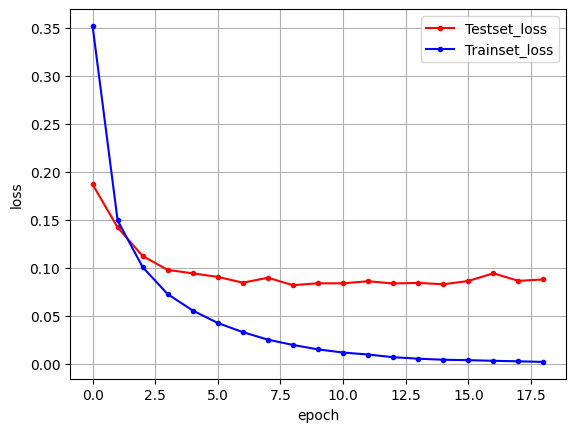

In [22]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

* 과적합 현상

In [23]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.9783 - loss: 0.0817


[0.07106966525316238, 0.9812999963760376]